<a href="https://colab.research.google.com/github/jumafernandez/data-science-II/blob/main/clase-datos-espaciales/geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Lectura y Visualización de datos espaciales

En este notebook:
1. Instalamos GeoPandas (si no está instalado) y Folium.
2. Leemos un archivo GeoJSON (vectorial), mostramos los datos y los graficamos: sin mapa base y con mapa base.
3. Leemos un archivo ASC (raster), mostramos los datos y los graficamos: sin mapa base y con mapa base.

### Instalación de librerías

In [1]:
!pip install folium geopandas

In [2]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

Definición de la ruta para los archivos con los que vamos a trabajar:

In [3]:
# Ajusta la ruta a tu archivo GeoJSON
ruta_geojson = "https://raw.githubusercontent.com/jumafernandez/data-science-II/refs/heads/main/clase-datos-espaciales/data/datos_vectoriales.geojson"
ruta_asc = "https://raw.githubusercontent.com/jumafernandez/data-science-II/refs/heads/main/clase-datos-espaciales/data/triangulo_argentina.asc"

### Lectura y visualización con datos vectoriales (GeoJSON)

Realizamos la lectura del GeoJSON:

In [4]:
gdf = gpd.read_file(ruta_geojson)

print("Contenido del GeoDataFrame (primeras filas):")
gdf.head()

Contenido del GeoDataFrame (primeras filas):


,name,geometry
0,Estación 1,POINT (30 10)
1,Estación 2,POINT (40 20)
2,Parcela A,"POLYGON ((30 10, 40 10, 40 20, 30 20, 30 10))"


Lo graficamos sin mapa base:

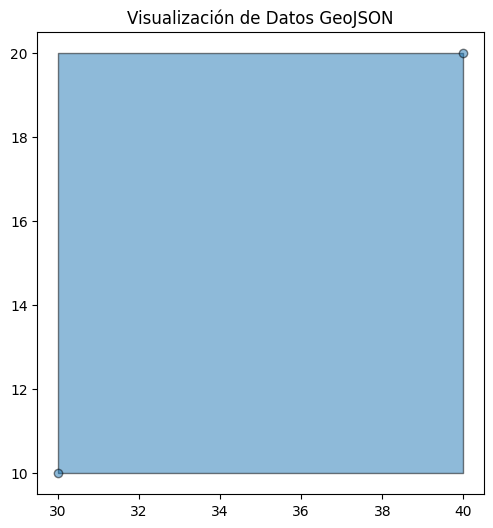

In [5]:
ax = gdf.plot(
     figsize=(6, 6),       # Tamaño de la figura
     alpha=0.5,            # Transparencia
     edgecolor='black'     # Color de bordes en polígonos
    )

plt.title("Visualización de Datos GeoJSON")
plt.show()

Ahora lo graficamos con mapa base:

In [6]:
# Crear el mapa centrado en el promedio de las coordenadas del GeoDataFrame
centro = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mapa = folium.Map(location=centro,
                  zoom_start=2,
                  width="50%",      # Ancho del mapa (puede ser en píxeles o porcentaje)
                  height="400px")   # Alto del mapa (puede ser en píxeles o porcentaje))

# Añadir las geometrías al mapa
for _, row in gdf.iterrows():
    folium.GeoJson(row.geometry).add_to(mapa)

# Mostrar el mapa
mapa


<ipython-input-6-f30c6b3e9b3d>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centro = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


### Lectura y visualización de datos raster (ASC)

In [7]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from ipyleaflet import Map, ImageOverlay

In [8]:
response = requests.get(ruta_asc)
response.raise_for_status()  # Lanzar una excepción para respuestas incorrectas (4xx o 5xx)
data_str = response.text

data_str

'ncols        50\nnrows        50\nxllcorner    -70.0\nyllcorner    -35.0\ncellsize     0.2\nNODATA_value -9999\n255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 035 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255\n255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 035 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255\n255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 034 034 035 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255\n255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 033 034 034 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255\n255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

In [9]:
# Dividir los datos en líneas
lines = data_str.splitlines()

In [10]:
header = lines[:6]

# Extraer información del encabezado
header_info = {line.split()[0]: float(line.split()[1]) for line in header}
ncols = int(header_info['ncols'])
nrows = int(header_info['nrows'])
xllcorner = header_info['xllcorner']
yllcorner = header_info['yllcorner']
cellsize = header_info['cellsize']

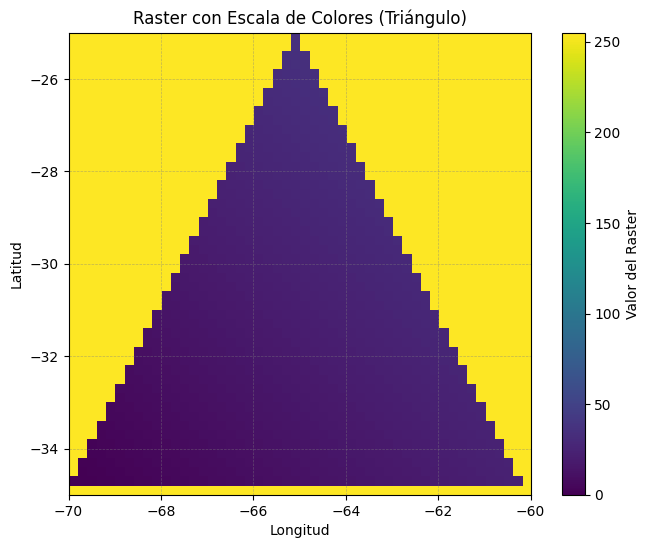

In [11]:
# Omitir las primeras 6 líneas de encabezado
raster_data_lines = lines[6:]

# Convertir las líneas restantes en un array NumPy
raster_data = np.loadtxt(raster_data_lines, dtype=float)

# Crear el gráfico con los datos raster
plt.figure(figsize=(8, 6))
plt.imshow(raster_data, cmap='viridis', extent=[xllcorner, xllcorner + ncols * cellsize,
                                                yllcorner, yllcorner + nrows * cellsize])
plt.colorbar(label="Valor del Raster")
plt.title("Raster con Escala de Colores (Triángulo)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [14]:
from ipyleaflet import Map, ImageOverlay

# Coordenadas de los bordes del raster (basadas en los datos originales)
bounds = [
    [-35.0, -70.0],  # Esquina inferior izquierda (latitud, longitud)
    [-25.0, -60.0]   # Esquina superior derecha (latitud, longitud)
]

# Crear el mapa centrado en el área del triángulo
centro = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
mapa = Map(center=centro, zoom=6)

# Usar la imagen directamente desde la URL
url_imagen = "https://raw.githubusercontent.com/jumafernandez/data-science-II/main/clase-datos-espaciales/data/triangulo_argentina.png"
image_overlay = ImageOverlay(
    url=url_imagen,
    bounds=bounds,
    opacity=0.6  # Ajustar la transparencia
)

# Agregar la superposición de la imagen al mapa
mapa.add_layer(image_overlay)

# Mostrar el mapa interactivo
mapa


Map(center=[-30.0, -65.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…